# Interactive Bath Model Analysis

This notebook provides an interactive analysis of different bosonic bath models used in quantum optics and open quantum systems. It allows comparison between different bath types and their spectral properties.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Bath Model Definitions](#definitions)
3. [Interactive Parameter Controls](#controls)
4. [Bath Comparison Analysis](#comparison)
5. [Temperature Effects](#temperature)
6. [Correlation Function Analysis](#correlation)

### Discussion: Units of Spectral Density in Different Conventions
$J(\omega)$ describes the spectral density of environmental modes at a given frequency $\omega$ and how strongly these modes couple to the system.
In the [paper](https://pubs.aip.org/aip/jcp/article/124/23/234505/930637/Two-dimensional-optical-three-pulse-photon-echo), **spectroscopic units of cm⁻¹** are used for transition frequencies ("wavenumbers"). The spectral density is defined as:
$$
J(\omega) = \alpha^2 \frac{\omega}{\omega_c} \exp\left(-\frac{\omega}{\omega_c}\right)
$$
where:
- $\alpha$ is the dimensionless coupling strength,
- $\omega_c$ is the cutoff frequency,
- $\omega$ is the frequency.

**Units:**  
- $J(\omega)$ is dimensionless in this context.


In **QuTiP**, the Ohmic spectral density is typically written as:
$$
J(\omega) = \alpha \frac{\omega^s}{\omega_c^{s-1}} \exp\left(-\frac{\omega}{\omega_c}\right)
$$
For the Ohmic case ($s = 1$):
$$
J(\omega) = \alpha \omega \exp\left(-\frac{\omega}{\omega_c}\right)
$$
where:
- $\alpha$ is the dimensionless coupling strength,
- $\omega_c$ is the cutoff frequency,
- $\omega$ is the frequency.

**Units:**  
- $J(\omega)$ now has units of frequency ($[\omega]$).


#### Physical Meaning

According to [Wikipedia](https://en.wikipedia.org/wiki/Spectral_density), the spectral density $J(\omega)$ represents the **amount of Power per unit frequency range**. ---

**References:**  
- Weiss, U. (2012). Quantum Dissipative Systems.

$$
H_{\text{SB}} = \Sigma_i F_i Aᵢ
$$

$$
[\mathbf{A}_i] =  \left[\mu\right] = 1  \quad \text{(dimensionless (in the paper))}
$$

$$
[H_{\text{SB}}] = \left[J\right] = \left[eV\right]
$$

Then:
$$
[F_i] = \left[ J\right] = \left[eV\right]
$$

And:
$$
[g_x^i] = \left[ J\right] = \left[eV\right] = \left[ \omega\right] \text{(because [HBAR]=1)}
$$

$$
[J_i(\omega)] = [g_x^{i\,2} \, \delta(\omega)] = \left[\omega\right] \text{(matches the Qutip definition)}
$$
But now:
$$
[J(\omega)] = [\alpha^2] ?=? \left[\omega^2\right]
$$


**Actually the coupling constant in the paper is Not dimensionless**


In [2]:
from pathlib import Path
custom_dir = Path("test_baths")
custom_dir.mkdir(exist_ok=True)

from plotstyle.style import init_style, COLORS, LINE_STYLES, MARKERS, save_fig

# Initialize matplotlib/LaTeX style once
init_style()

# -------------------------------------------------------------------
# Unit convention used throughout this notebook
# -------------------------------------------------------------------
# We work in arbitrary but consistent frequency units, and treat *all bath
# # parameters as unitless multiples of a reference transition frequency ω0.
w0 = 1.0

# Bath parameter multipliers (unitless): parameter = multiplier * ω0
cutoff_mult = 100.0  # ωc / ω0
temp_mult = 1e-2      # T / ω0
alpha_mult = 1e-2     # coupling / ω0

# Concrete bath parameters passed to QuTiP (same units as ω0)
cutoff = cutoff_mult * w0
temp = temp_mult * w0
alpha = alpha_mult * w0

# Ohmicity parameters
s_ohm = 1.0
s_sub_ohm = 0.8
s_super_ohm = 1.2

from qutip import BosonicEnvironment, OhmicEnvironment, DrudeLorentzEnvironment
import numpy as np
import matplotlib.pyplot as plt

# Display default bath parameters (as multiples of ω0)
print("🔧 Default bath parameters loaded (all multiples of ω0):")
print(f"   ω0: {w0:.3g}")
print(f"   T/ω0: {temp_mult:.1e}  ->  T={temp:.1e}")
print(f"   coupling/ω0: {alpha_mult:.1e}  ->  coupling={alpha:.1e}")
print(f"   ωc/ω0: {cutoff_mult:.1e}  ->  ωc={cutoff:.1e}")

🔧 Default bath parameters loaded (all multiples of ω0):
   ω0: 1
   T/ω0: 1.0e-02  ->  T=1.0e-02
   coupling/ω0: 1.0e-02  ->  coupling=1.0e-02
   ωc/ω0: 1.0e+02  ->  ωc=1.0e+02


In [3]:
# SEPARATE AXIS PLOTS FOR PAPER, OHMIC, AND DRUDE-LORENTZ BATHSJ
dl_env = DrudeLorentzEnvironment(
    T=temp,
    lam=alpha * cutoff / 2,
    gamma=cutoff,
 )
# Power spectrum and spectral density for each bath
bath_ohmic = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_ohm,
    alpha=alpha,
 )

# Frequency range for each bath
omega = np.linspace(-5 * w0, 5 * w0, 500)
times = np.linspace(-5 / cutoff, 5 / cutoff, 500)

J_func_ohmic = bath_ohmic.spectral_density
J_func_dl = dl_env.spectral_density

P_func_ohmic = bath_ohmic.power_spectrum
P_func_dl = dl_env.power_spectrum

J_vals_ohmic = J_func_ohmic(omega)
P_vals_ohmic = P_func_ohmic(omega)

J_vals_dl = J_func_dl(omega)
P_vals_dl = P_func_dl(omega)

corr_func_ohmic = bath_ohmic.correlation_function
corr_func_dl = dl_env.correlation_function

corr_ohmic = corr_func_ohmic(times)
corr_dl = corr_func_dl(times)

# Sub-Ohmic and Super-Ohmic baths
bath_sub = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_sub_ohm,
    alpha=alpha,
 )
bath_super = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_super_ohm,
    alpha=alpha,
 )

J_func_sub = bath_sub.spectral_density
J_func_super = bath_super.spectral_density

P_func_sub = bath_sub.power_spectrum
P_func_super = bath_super.power_spectrum

J_vals_sub = J_func_sub(omega)
P_vals_sub = P_func_sub(omega)
J_vals_super = J_func_super(omega)
P_vals_super = P_func_super(omega)

corr_func_sub = bath_sub.correlation_function
corr_func_super = bath_super.correlation_function

corr_sub = corr_func_sub(times)
corr_super = corr_func_super(times)


def four_panel_comparison(
    freq_axis,
    time_axis,
    datasets,
    title,
    filename=None,
    marker_positions=None,
    normalize=False,
 ):
    """Plot spectral density, power spectrum, and correlation (real/imag) for multiple datasets."""
    if normalize:
        normalized_datasets = []
        for label, spectral_vals, power_vals, corr_vals in datasets:
            J_max = np.max(np.abs(spectral_vals))
            spectral_norm = spectral_vals / J_max if J_max > 0 else spectral_vals
            P_max = np.max(np.abs(power_vals))
            power_norm = power_vals / P_max if P_max > 0 else power_vals
            C_max = np.max(np.abs(corr_vals))
            corr_norm = corr_vals / C_max if C_max > 0 else corr_vals
            normalized_datasets.append((label, spectral_norm, power_norm, corr_norm))
        datasets = normalized_datasets

    fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10, 8))
    fig.suptitle(title, fontsize=14, y=0.95)

    for idx, (label, spectral_vals, power_vals, corr_vals) in enumerate(datasets):
        color = COLORS[idx % len(COLORS)]
        linestyle = LINE_STYLES[idx % len(LINE_STYLES)]
        axes[0, 0].plot(
            freq_axis,
            spectral_vals,
            label=label,
            color=color,
            linestyle=linestyle,
        )
        axes[0, 1].plot(
            freq_axis,
            power_vals,
            label=label,
            color=color,
            linestyle=linestyle,
        )
        axes[1, 0].plot(
            time_axis,
            np.real(corr_vals),
            label=label,
            color=color,
            linestyle=linestyle,
        )
        axes[1, 1].plot(
            time_axis,
            np.imag(corr_vals),
            label=label,
            color=color,
            linestyle=linestyle,
        )

    if marker_positions:
        for value in marker_positions:
            axes[0, 0].axvline(x=value, color="gray", linestyle="--", linewidth=1)

    if normalize:
        axes[0, 0].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 0].set_ylabel(r"$J(\omega) / \max|J|$")
        axes[0, 0].set_title("Spectral Density")
        axes[0, 1].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 1].set_ylabel(r"$\mathcal{S}(\omega) / \max|\mathcal{S}|$")
        axes[0, 1].set_title("Power Spectrum")
        axes[1, 0].set_xlabel(r"$t\,\omega_c$")
        axes[1, 0].set_ylabel(r"$\mathrm{Re}[C(t)] / \max|C|$")
        axes[1, 0].set_title("Correlation (Real Part)")
        axes[1, 1].set_xlabel(r"$t\,\omega_c$")
        axes[1, 1].set_ylabel(r"$\mathrm{Im}[C(t)] / \max|C|$")
        axes[1, 1].set_title("Correlation (Imag Part)")
    else:
        axes[0, 0].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 0].set_ylabel(r"$J(\omega)$")
        axes[0, 0].set_title("Spectral Density")
        axes[0, 1].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 1].set_ylabel(r"$\mathcal{S}(\omega)$")
        axes[0, 1].set_title("Power Spectrum")
        axes[1, 0].set_xlabel(r"$t\,\omega_c$")
        axes[1, 0].set_ylabel(r"$\mathrm{Re}[C(t)]$")
        axes[1, 0].set_title("Correlation (Real Part)")
        axes[1, 1].set_xlabel(r"$t\,\omega_c$")
        axes[1, 1].set_ylabel(r"$\mathrm{Im}[C(t)]$")
        axes[1, 1].set_title("Correlation (Imag Part)")

    for ax in axes.ravel():
        ax.legend()

    fig.tight_layout(rect=[0, 0, 1, 0.92])

    if filename is not None:
        save_fig(fig, filename, formats=["png", "pdf", "svg"])

    return fig, axes


def analyze_temperature_effects(freq_axis, time_axis, baths, labels, title="Analysis", filename=None):
    datasets = []
    for bath, label in zip(baths, labels):
        omega = freq_axis * cutoff
        t = time_axis / cutoff
        J = bath.spectral_density(omega)
        P = bath.power_spectrum(omega)
        C = bath.correlation_function(t)
        datasets.append((label, J, P, C))
    return four_panel_comparison(freq_axis, time_axis, datasets, title, filename, normalize=True)


# -------------------------------------------------------------------
# Helpers to reduce repetition in later cells (no functionality removed)
# -------------------------------------------------------------------
DEFAULT_T_MULTS = [1e-3, 1, 1e2, 1e4]  # T/ω0


def temps_and_labels_from_mults(mults=DEFAULT_T_MULTS):
    mults = list(mults)
    temps = [t * w0 for t in mults]
    labels = [f"T/ω0={t:g}" for t in mults]
    return temps, labels


def temps_and_labels_from_mults_tex(mults=DEFAULT_T_MULTS):
    """TeX-safe labels (avoid unicode ω which breaks usetex)."""
    mults = list(mults)
    temps = [t * w0 for t in mults]
    labels = [rf"$T/\omega_0={t:g}$" for t in mults]
    return temps, labels


def run_temperature_analysis(bath_factory, title, out_basename, mults=DEFAULT_T_MULTS):
    temps, labels = temps_and_labels_from_mults_tex(mults)
    baths = [bath_factory(T) for T in temps]
    fig, axes = analyze_temperature_effects(
        omega / cutoff,
        times * cutoff,
        baths,
        labels,
        title,
        custom_dir / out_basename,
    )
    save_fig(fig, custom_dir / out_basename)
    return fig, axes


In [4]:
# CUSTOM BATH COMPARISON:
#  2) Ohmic bath + low-frequency Lorentzian-weighted boost (for pure dephasing)

# Peak parameters (normalized)
peak_center = 1.0      # ω_center / ω0  (0 => boosts very low frequencies)
peak_width = 0.5      # γ / ω0 (HWHM)
peak_strength = 1.0    # (boost strength) / alpha

# Convert to internal units
peak_center_abs = peak_center * w0
peak_width_abs = peak_width * w0
peak_strength_abs = peak_strength * alpha

# --- Bath 2: Same Ohmic background + low-frequency boost ---
def J_lorentz_boost(w, center=peak_center_abs, gamma=peak_width_abs, strength=peak_strength_abs):
    """Lorentzian-weighted *Ohmic-like* boost term for J(ω).
    """
    w_arr = np.asarray(w, dtype=float)
    J = strength * w_arr * (gamma**2) / ((w_arr - center) ** 2 + gamma**2)
    return J

def J_ohmic_plus_boost(w):
    return bath_ohmic.spectral_density(w) + J_lorentz_boost(w)# + J_lorentz_boost(-w)

bath_ohmic_plus_peak = BosonicEnvironment.from_spectral_density(
    J_ohmic_plus_boost,
    T=temp,
    wMax=10.0 * cutoff,
 )
bath_only_boost = BosonicEnvironment.from_spectral_density(
    lambda w: J_lorentz_boost(w) - J_lorentz_boost(-w),
    T=temp,
    wMax=10.0 * cutoff,
)
J_boost = bath_ohmic_plus_peak.spectral_density(omega)
P_boost = bath_ohmic_plus_peak.power_spectrum(omega)
C_boost = bath_ohmic_plus_peak.correlation_function(times)

datasets = [
    ("Ohmic", J_vals_ohmic, P_vals_ohmic, corr_ohmic),
    ("Ohmic + boost", J_boost, P_boost, C_boost),
    ("Only boost", bath_only_boost.spectral_density(omega), bath_only_boost.power_spectrum(omega), bath_only_boost.correlation_function(times)),
    #("Sub-ohmic", J_vals_sub, P_vals_sub, corr_sub),
 ]


c:\Users\leopo\anaconda3\envs\m_env\Lib\site-packages\qutip\utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


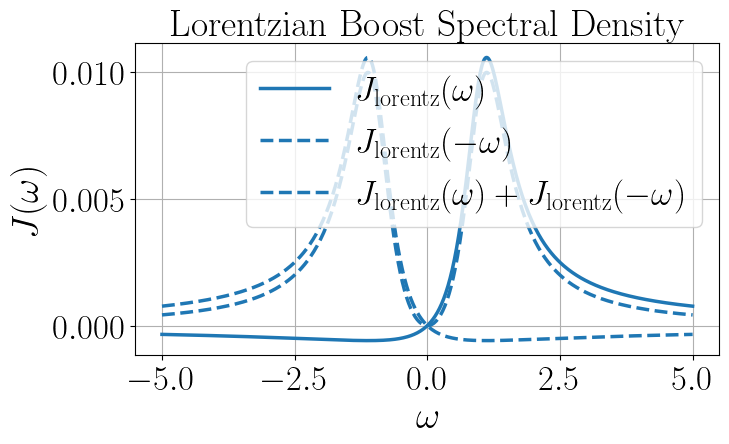

In [5]:
import matplotlib.pyplot as plt

# Compute J_lorentz_boost at omega
J_vals = J_lorentz_boost(omega)
J_vals_negative = J_lorentz_boost(-omega)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(omega, J_vals, label=r'$J_{\mathrm{lorentz}}(\omega)$')
plt.plot(omega, J_vals_negative, label=r'$J_{\mathrm{lorentz}}(-\omega)$')
plt.plot(omega, J_vals + J_vals_negative, label=r'$J_{\mathrm{lorentz}}(\omega) + J_{\mathrm{lorentz}}(-\omega)$', linestyle='--')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$J(\omega)$')
plt.title('Lorentzian Boost Spectral Density')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\leopo\anaconda3\envs\m_env\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


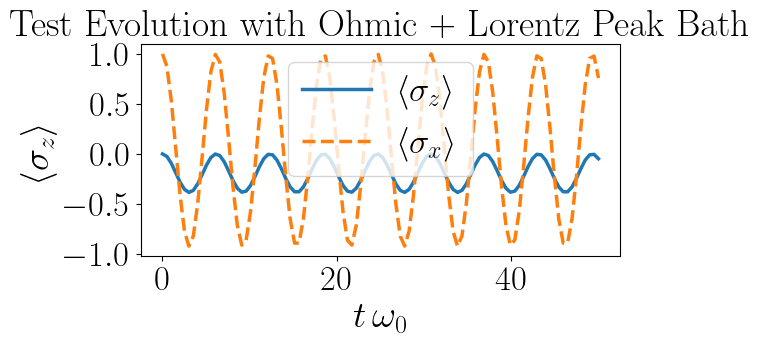

In [6]:
import qutip as qt
import numpy as np

# Define a simple two-level system (TLS) for testing
# System Hamiltonian: TLS at frequency w0
sz = qt.sigmaz()
sx = qt.sigmax()
H_sys = w0 * qt.basis(2, 1) * qt.basis(2, 1).dag() + 0.1 * w0 * sx

# Initial state: superposition state
psi0 = (qt.basis(2, 0) + qt.basis(2, 1)).unit()

# Time list for evolution
tlist = np.linspace(0, 50 / w0, 100)

# Solve using brmesolve with the custom bath
a_ops = [[sz, bath_sub], [sx, bath_sub]]
e_ops = [sz, sx]
options = qt.Options(nsteps=10000)
result = qt.brmesolve(H=H_sys, psi0=psi0, tlist=tlist, e_ops=e_ops, a_ops=a_ops, options=options)

fig, ax = plt.subplots(figsize=(6.5, 4.0))
operator_names = [r'\sigma_z', r'\sigma_x']
for i in range(len(result.e_ops)):
    ax.plot(
        np.asarray(result.times) * w0,
        result.expect[i],
        color=COLORS[i % len(COLORS)],
        label=rf"$\langle {operator_names[i]} \rangle$",
    )
ax.set_xlabel(r"$t\,\omega_0$")
ax.set_ylabel(r"$\langle\sigma_z\rangle$")
ax.set_title("Test Evolution with Ohmic + Lorentz Peak Bath")
ax.legend()
fig.tight_layout()

# Optional: save alongside other figures
save_fig(fig, custom_dir / "tls_test_brmesolve_ohmic_plus_peak", formats=["png", "pdf", "svg"])

plt.show()

KeyboardInterrupt: 

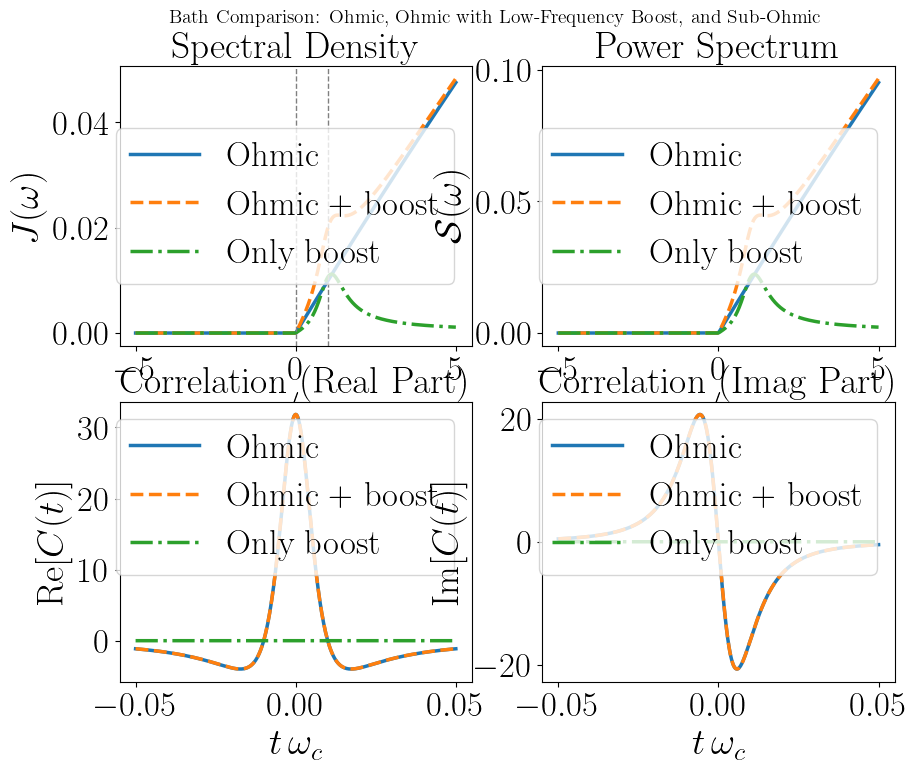

In [7]:
title = "Bath Comparison: Ohmic, Ohmic with Low-Frequency Boost, and Sub-Ohmic"
filename = custom_dir / "bath_comparison_with_boost"
fig, axes = four_panel_comparison(
    omega / w0,
    times * w0,
    datasets,
    title,
    filename=filename,
    marker_positions=[0.0, 1.0],
    normalize=False,
 )

plt.show()

In [ ]:
# APPROXIMATE OHMIC + LORENTZIAN-PEAK BATH (Matsubara where supported)
#
# Key point from QuTiP docs:
# - Matsubara/Pade expansions are only implemented for certain *analytic* environments, e.g.:
#     DrudeLorentzEnvironment.approximate(method="matsubara"|"pade", ...)
#     UnderDampedEnvironment.approximate(method="matsubara", ...)
# - A generic environment built from an arbitrary spectral density
#     BosonicEnvironment.from_spectral_density(...)
#   cannot be expanded by Matsubara; it only supports fit-based methods (cf/ps/sd/aaa/prony/...).
#
# For our custom Ohmic + sharp peak bath, the simplest working approach is:
#   1) Keep the Ohmic background and approximate it with an exponential fit (Prony).
#   2) Represent the sharp peak as an analytic underdamped mode and approximate it by Matsubara.
#   3) Combine exponent lists into one ExponentialBosonicEnvironment (HEOM-ready).

from qutip import UnderDampedEnvironment
from qutip.core.environment import ExponentialBosonicEnvironment

Nk_values_peak = [1, 3, 5]

# Exact reference curves on the TLS-scaled grids (already computed via from_spectral_density)
J_exact = bath_ohmic_plus_peak.spectral_density(omega)
P_exact = bath_ohmic_plus_peak.power_spectrum(omega)
C_exact = bath_ohmic_plus_peak.correlation_function(times)

# We'll only plot these two in the end:
datasets_plot = [("Exact", J_exact, P_exact, C_exact)]

# --- Analytic decomposition: Ohmic background + underdamped BO peak ---
# Match the peak *height* at ω=w0 (roughly) by choosing λ so that J_BO(w0)≈peak_strength.
# For QuTiP's UnderDampedEnvironment, at ω=w0: J_BO(w0)=2*λ*w0/γ  =>  λ ≈ peak_strength*γ/(2*w0)
w0_peak = float(w0)
gamma_peak = float(peak_width)
lam_peak = float(peak_strength) * gamma_peak / (2.0 * w0_peak)

ohmic_env = bath_ohmic  # analytic OhmicEnvironment already defined earlier
peak_env = UnderDampedEnvironment(T=temp, lam=lam_peak, gamma=gamma_peak, w0=w0_peak, tag="peak_bo")

# (Optional sanity check: analytic surrogate sum vs original Lorentz-peak definition)
J_sur = ohmic_env.spectral_density(omega) + peak_env.spectral_density(omega)
P_sur = ohmic_env.power_spectrum(omega) + peak_env.power_spectrum(omega)
C_sur = ohmic_env.correlation_function(times) + peak_env.correlation_function(times)

# --- Step 1: exponential approximation for Ohmic background (Prony) ---
# Use the same time grid as used for the diagnostics so the comparison is apples-to-apples.
# Note: when specifying Ni, QuTiP requires separate=True (fit Re/Im separately).
Nr_ohm, Ni_ohm = 6, 6
ohm_fit, ohm_fit_info = ohmic_env.approximate(
    method="prony",
    tlist=times,
    Nr=Nr_ohm,
    Ni=Ni_ohm,
    separate=True,
    tag=f"ohmic_prony_Nr{Nr_ohm}_Ni{Ni_ohm}",
)

# --- Step 2/3: Matsubara expansion for peak, then combine exponent series ---
# We choose the 'best' approximation by minimizing the RMSE on the correlation function C(t),
# which is what HEOM actually uses.
best_rmse_C = np.inf
best_Nk = None
best_tuple = None

for Nk in Nk_values_peak:
    try:
        peak_fit = peak_env.approximate(
            method="matsubara",
            Nk=int(Nk),
            combine=True,
            tag=f"peak_matsubara_Nk{Nk}",
        )
    except Exception as err:
        print(f"⚠️ Peak Matsubara expansion failed (Nk={Nk}): {err}")
        continue

    combined_env = ExponentialBosonicEnvironment(
        exponents=list(ohm_fit.exponents) + list(peak_fit.exponents),
        combine=True,
        T=temp,
        tag=f"ohmic_prony + peak_matsubara Nk={Nk}",
    )

    J_app = combined_env.spectral_density(omega)
    P_app = combined_env.power_spectrum(omega)
    C_app = combined_env.correlation_function(times)

    rmse_J = np.sqrt(np.mean((J_app - J_exact) ** 2))
    rmse_P = np.sqrt(np.mean((P_app - P_exact) ** 2))
    rmse_C = np.sqrt(np.mean(np.abs(C_app - C_exact) ** 2))
    print(f"RMSE total (Nk_peak={Nk}): J={rmse_J:.2e}, S={rmse_P:.2e}, C={rmse_C:.2e}")

    if rmse_C < best_rmse_C:
        best_rmse_C = float(rmse_C)
        best_Nk = int(Nk)
        best_tuple = (J_app, P_app, C_app)

if best_tuple is None:
    raise RuntimeError("No Matsubara peak approximation succeeded; cannot choose a best fit.")

J_best, P_best, C_best = best_tuple
datasets_plot.append((f"Best approx (Nk={best_Nk})", J_best, P_best, C_best))

title = (
    "Ohmic + Lorentzian peak (TLS) — Mixed Exponential Approximation\n"
    + f"Best: Prony(Ohmic) + Matsubara(Peak), Nk={best_Nk}  (Nr={Nr_ohm}, Ni={Ni_ohm})\n"
    + rf"$T/\omega_0$={temp_mult:.2e}, $\omega_c/\omega_0$={cutoff:.0f}, peak at $\omega/\omega_0$=1"
)

fig_peak_fit, axes_peak_fit = four_panel_comparison(
    omega / w0,
    times * w0,
    datasets_plot,
    title,
    filename=custom_dir
    / f"ohmic_plus_peak_mixed_best_prony_matsubara_TOverw0{temp_mult:.2e}_wcOverw0{cutoff:.0f}_gOverw0{peak_width_mult:.3f}",
    marker_positions=[1.0],
    normalize=False,
)

# Fix axis labels for this specific plot (helper defaults use ωc labels)
axes_peak_fit[0, 0].set_xlabel(r"$\omega/\omega_0$")
axes_peak_fit[0, 1].set_xlabel(r"$\omega/\omega_0$")
axes_peak_fit[1, 0].set_xlabel(r"$t\,\omega_0$")
axes_peak_fit[1, 1].set_xlabel(r"$t\,\omega_0$")

plt.show()


RMSE total (Nk_peak=1): J=2.04e-01, S=4.09e-01, C=1.28e+01
RMSE total (Nk_peak=3): J=2.04e-01, S=4.09e-01, C=1.28e+01
RMSE total (Nk_peak=5): J=2.04e-01, S=4.09e-01, C=1.28e+01


NameError: name 'peak_width_mult' is not defined

In [ ]:
# COMPARISON BETWEEN OHMIC (s=1) AND DRUDE-LORENTZ BATHS
comparison_datasets = [
    ("Ohmic (s=1)", J_vals_ohmic, P_vals_ohmic, corr_ohmic),
    ("Drude-Lorentz", J_vals_dl, P_vals_dl, corr_dl),
]

title = (
    "Ohmic (s=1) vs Drude-Lorentz Bath Comparison\n"
    fr"$\alpha$={alpha:.1e}, T={temp:.1e}, $\omega_c$={cutoff:.1e}"
)

fig, axes = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    comparison_datasets,
    title,
    filename=custom_dir / f"ohmic_vs_drude_lorentz_{alpha:.3f}_{cutoff:.2f}_{temp:.3f}",
)

In [ ]:
# TEST Super-Ohmic High-frequency phonons, electromagnetic vacuum (e.g. 3D dipole coupling →  𝑠=3). CHATGPT: "Fast-decaying correlations, weaker dephasing at low T."
from matplotlib.pylab import norm


s_phonon = 3
phonon_env = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_phonon,
    alpha=alpha,
 )

J_func_phonon = phonon_env.spectral_density
P_func_phonon = phonon_env.power_spectrum
corr_func_phonon = phonon_env.correlation_function

# Add these lines after defining the phonon environment
J_vals_phonon = J_func_phonon(omega)
P_vals_phonon = P_func_phonon(omega)
corr_phonon = corr_func_phonon(times)

comparison_datasets = [
    ("Ohmic (s=1)", J_vals_ohmic, P_vals_ohmic, corr_ohmic),
    ("Phonon (s=3)", J_vals_phonon, P_vals_phonon, corr_phonon),
]

fig, axes = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    comparison_datasets,
    title,
    filename=custom_dir / f"ohmic_vs_drude_lorentz_{alpha:.3f}_{cutoff:.2f}_{temp:.3f}",
    normalize=True
)


## Temperature Effects Analysis

Explore how temperature affects the bath properties, particularly the Power spectrum and correlation functions:

In [ ]:
# TEMPERATURE EFFECTS ANALYSIS (all temperatures are multiples of ω0)
print("🌡️ Analyzing temperature effects...")

fig_temp, axes_temp = run_temperature_analysis(
    bath_factory=lambda T: OhmicEnvironment(T=T, wc=cutoff, s=s_ohm, alpha=alpha),
    title="Temperature Analysis for Ohmic Bath",
    out_basename="temperature_analysis_ohmic_bath",
)


In [ ]:
# Create temperature analysis for Super-Ohmic bath (all temperatures are multiples of ω0)
print("🌡️ Analyzing temperature effects for super-ohmic Bath...")

fig_temp_super_ohm, axes_temp_super_ohm = run_temperature_analysis(
    bath_factory=lambda T: OhmicEnvironment(T=T, wc=cutoff, s=s_super_ohm, alpha=alpha),
    title="Temperature Analysis for Super-Ohmic Bath",
    out_basename="temperature_analysis_super_ohmic_bath",
)

In [ ]:
# Create temperature analysis for Phonon bath (all temperatures are multiples of ω0)
print("🌡️ Analyzing temperature effects for Phonon Bath...")

fig_temp_phonon, axes_temp_phonon = run_temperature_analysis(
    bath_factory=lambda T: OhmicEnvironment(T=T, wc=cutoff, s=s_phonon, alpha=alpha),
    title="Temperature Analysis for Phonon Bath",
    out_basename="temperature_analysis_phonon_bath",
)

In [ ]:
print("🌡️ Analyzing temperature effects for Drude-Lorentz Bath...")

temperatures_dl, labels_dl = temps_and_labels_from_mults_tex(DEFAULT_T_MULTS)
baths_dl = [DrudeLorentzEnvironment(T=T, lam=alpha, gamma=cutoff) for T in temperatures_dl]

fig_temp_dl, axes_temp_dl = analyze_temperature_effects(
    omega / cutoff,
    times * cutoff,
    baths_dl,
    labels_dl,
    "Temperature Analysis for Drude-Lorentz Bath",
    custom_dir / "temperature_analysis_drude_lorentz_bath",
)
save_fig(fig_temp_dl, custom_dir / "temperature_analysis_drude_lorentz_bath")


In [ ]:
# APPROXIMATE DRUDE-LORENTZ BATH USING PRONY METHOD WITH DIFFERENT Nr AND Ni VALUES
# Approximate using prony method with different Nr and Ni for comparison
pairs = [(1, 1), (3, 3), (7, 7), (10, 10)]
approx_envs = []
fit_infos = []

for Nr, Ni in pairs:
    approx_env, fit_info = dl_env.approximate(
        method="prony",
        tlist=np.linspace(0, 10 / cutoff, 1000),  # Time list for correlation function
        Nr=Nr,  # Number of real poles
        Ni=Ni,  # Number of imaginary poles
        separate=True,  # Need separate=True to specify both Nr and Ni
        combine=True,
        tag=f"Drude-Lorentz Prony approximation Nr={Nr}, Ni={Ni}",
    )
    approx_envs.append(approx_env)
    fit_infos.append(fit_info)

print("Prony approximations completed for all pairs")

# Compare spectral densities, power spectra, and correlation functions
J_approx_list = [env.spectral_density(omega) for env in approx_envs]
P_approx_list = [env.power_spectrum(omega) for env in approx_envs]
corr_approx_list = [env.correlation_function(times) for env in approx_envs]

# Exact values
J_exact = dl_env.spectral_density(omega)
P_exact = dl_env.power_spectrum(omega)
corr_exact = dl_env.correlation_function(times)

datasets_prony = [("Exact", J_exact, P_exact, corr_exact)]
for idx, (Nr, Ni) in enumerate(pairs):
    datasets_prony.append(
        (f"Nr={Nr}, Ni={Ni}", J_approx_list[idx], P_approx_list[idx], corr_approx_list[idx])
    )

fig_prony, axes_prony = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    datasets_prony,
    "Drude-Lorentz Bath Approximation using Prony Method",
    filename=custom_dir / "drude_lorentz_prony_comparison",
)

plt.show()

# Print approximation quality for each pair
for i, (Nr, Ni) in enumerate(pairs):
    rmse_J = np.sqrt(np.mean((J_approx_list[i] - J_exact) ** 2))
    rmse_P = np.sqrt(np.mean((P_approx_list[i] - P_exact) ** 2))
    rmse_corr = np.sqrt(np.mean(np.abs(corr_approx_list[i] - corr_exact) ** 2))
    print(
        f"RMSE for Nr={Nr}, Ni={Ni}: Spectral Density: {rmse_J:.2e}, Power Spectrum: {rmse_P:.2e}, Correlation: {rmse_corr:.2e}"
    )

In [ ]:
# CUSTOM BOSONIC ENVIRONMENTS FROM USER-DEFINED SPECTRAL DENSITIES
# Frequency range for each bath
omega_bo = np.linspace(-1 * cutoff, 1 * cutoff, 500)
# Time axes for correlation functions
times_bo = np.linspace(-1000 / cutoff, 1000 / cutoff, 500)
lambda1 = 1.0
omega01 = 3.0
gamma1 = 3.0
lambda2 = 0.5
omega02 = 6.0
gamma2 = 2.0

def J_ubo(w, lambda_, omega0, gamma):
    w = np.asarray(w)
    wp = np.clip(w, 0, None)
    numerator = 2 * lambda_ * gamma * wp * omega0**2
    denominator = (wp**2 - omega0**2) ** 2 + (gamma * wp) ** 2
    return numerator / denominator

def J_single_ubo(w):
    return J_ubo(w, lambda_=lambda1, omega0=omega01, gamma=gamma1)
def J_two_ubo(w):
    return J_ubo(w, lambda_=lambda1, omega0=omega01, gamma=gamma1) + J_ubo(w, lambda_=lambda2, omega0=omega02, gamma=gamma2)

custom_sd_funcs = {
    "Under-damped BO": lambda w: J_ubo(w, lambda_=lambda1, omega0=omega01, gamma=gamma1),
    "Two Under-damped BO": J_two_ubo,
}

custom_datasets = []
failures = []
wmax_candidate = float(max(np.abs(omega_bo).max(), 10 * cutoff))

for label, sd_func in custom_sd_funcs.items():
    try:
        custom_env = BosonicEnvironment.from_spectral_density(
            sd_func,
            wMax=wmax_candidate,
            T=temp,
        )
    except Exception as err:
        failures.append((label, err))
        print(f"⚠️ Failed to build {label} environment: {err}")
        continue

    print(f"✅ Built {label} BosonicEnvironment (wMax={wmax_candidate:.2f})")
    spectral_vals = custom_env.spectral_density(omega_bo)
    power_vals = custom_env.power_spectrum(omega_bo)
    corr_vals = custom_env.correlation_function(times_bo)
    custom_datasets.append((label, spectral_vals, power_vals, corr_vals))

if custom_datasets:
    fig_custom, axes_custom = four_panel_comparison(
        omega_bo / cutoff,
        times_bo * cutoff,
        custom_datasets,
        "Custom Spectral Densities (scaled by $\omega_c$)",
        filename=custom_dir / "custom_sd_lorentz_ubo",
    )
    for ax in axes_custom[0]:
        ax.set_xlabel(r"$\omega / \omega_c$")
    for ax in axes_custom[1]:
        ax.set_xlabel(r"$t \omega_c$")
    plt.show()
else:
    print("❌ No custom environments available for plotting.")

In [ ]:
# APPROXIMATE CUSTOM BATHS USING PRONY METHOD
prony_pairs_custom = [(1, 1), (3, 3), (5, 5)]
custom_prony_results = {}
custom_prony_infos = {}

for label, sd_func in custom_sd_funcs.items():
    try:
        target_env = BosonicEnvironment.from_spectral_density(
            sd_func,
            wMax=wmax_candidate,
            T=temp,
        )
    except Exception as err:
        print(f"⚠️ Skipping {label} for prony approximation: {err}")
        continue

    datasets = [("Exact", target_env.spectral_density(omega_bo), target_env.power_spectrum(omega_bo), target_env.correlation_function(times_bo))]
    custom_prony_results[label] = []
    custom_prony_infos[label] = []
    for Nr, Ni in prony_pairs_custom:
        try:
            approx_env, fit_info = target_env.approximate(
                method="prony",
                tlist=np.linspace(0, times_bo.max(), 1500),
                separate=True,
                Nr=Nr,
                Ni=Ni,
                combine=True,
                tag=f"{label} Prony approximation Nr={Nr}, Ni={Ni}",
            )
        except Exception as err:
            print(f"⚠️ Prony approximation failed for {label} (Nr={Nr}, Ni={Ni}): {err}")
            continue

        custom_prony_results[label].append((approx_env, fit_info))
        custom_prony_infos[label].append(fit_info)
        datasets.append(
            (
                f"Nr={Nr}, Ni={Ni}",
                approx_env.spectral_density(omega_bo),
                approx_env.power_spectrum(omega_bo),
                approx_env.correlation_function(times_bo),
            )
        )

        rmse_J = np.sqrt(np.mean((datasets[-1][1] - datasets[0][1]) ** 2))
        rmse_P = np.sqrt(np.mean((datasets[-1][2] - datasets[0][2]) ** 2))
        rmse_corr = np.sqrt(np.mean(np.abs(datasets[-1][3] - datasets[0][3]) ** 2))
        print(
            f"RMSE for {label} Nr={Nr}, Ni={Ni}: J={rmse_J:.2e}, S={rmse_P:.2e}, C={rmse_corr:.2e}",
        )

    if len(datasets) == 1:
        print(f"❌ No successful Prony approximations for {label}.")
        continue

    label_slug = label.lower().replace(" ", "_")
    fig_label = f"{label} Prony Approximation"
    fig_custom_prony, axes_custom_prony = four_panel_comparison(
        omega_bo / cutoff,
        times_bo * cutoff,
        datasets,
        fig_label,
        filename=custom_dir / f"custom_{label_slug}_prony_comparison",
    )
    for ax in axes_custom_prony[0]:
        ax.set_xlabel(r"$\omega / \omega_c$")
    for ax in axes_custom_prony[1]:
        ax.set_xlabel(r"$t \omega_c$")
    plt.show()

In [ ]:
# APPROXIMATE DRUDE-LORENTZ BATH USING SPECTRAL-DENSITY (SD) METHOD TODO THIS IS VERY PO OR
n_exp_values = [1, 3, 5, 7]
wlist_sd = np.linspace(0, 8 * cutoff, 1000)
approx_sd_envs = []
approx_sd_infos = []

for n_exp in n_exp_values:
    env_sd, info_sd = dl_env.approximate(
        method="sd",
        wlist=wlist_sd,
        Nk=n_exp,
        target_rmse=5e-6,
        Nmax=n_exp,
        combine=True,
        tag=f"Drude-Lorentz SD approximation Nmax={n_exp}",
    )
    approx_sd_envs.append(env_sd)
    approx_sd_infos.append(info_sd)

print("SD approximations completed for all Nmax values")

J_sd_list = [env.spectral_density(omega) for env in approx_sd_envs]
P_sd_list = [env.power_spectrum(omega) for env in approx_sd_envs]
corr_sd_list = [env.correlation_function(times) for env in approx_sd_envs]

datasets_sd = [("Exact", J_vals_dl, P_vals_dl, corr_dl)]
for idx, n_exp in enumerate(n_exp_values):
    datasets_sd.append((f"SD Nmax={n_exp}", J_sd_list[idx], P_sd_list[idx], corr_sd_list[idx]))

fig_sd, axes_sd = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    datasets_sd,
    "Drude-Lorentz Bath Approximation using SD Method",
    filename=custom_dir / "drude_lorentz_sd_comparison",
)

plt.show()

for idx, n_exp in enumerate(n_exp_values):
    rmse_J = np.sqrt(np.mean((J_sd_list[idx] - J_vals_dl) ** 2))
    rmse_P = np.sqrt(np.mean((P_sd_list[idx] - P_vals_dl) ** 2))
    rmse_corr = np.sqrt(np.mean(np.abs(corr_sd_list[idx] - corr_dl) ** 2))
    print(
        f"RMSE for SD Nmax={n_exp}: Spectral Density: {rmse_J:.2e}, Power Spectrum: {rmse_P:.2e}, Correlation: {rmse_corr:.2e}"
    )
    info = approx_sd_infos[idx]
    if isinstance(info, dict) and info:
        limited_info = {k: info[k] for k in list(info)[:3]}
        print(f"  Fit info (sample): {limited_info}")

## Thesis-ready figures for the OQS chapter

The cells below generate a small set of **publication-style, explanatory figures** that are commonly useful in an Open Quantum Systems (OQS) chapter:

1. Detailed balance / KMS condition in the bath power spectrum $\mathcal{S}(\omega)$
2. Bath memory time vs cutoff frequency $\omega_c$ (Markov limit intuition)
3. Effect of adding a narrow vibrational peak to an Ohmic background (non-Markovian oscillations)

All figures are saved as `png`, `pdf`, and `svg` into `thesis_python/figures/` (created automatically).

## Chapter c20: Generate the figures used in the LaTeX placeholders

The c20 chapter currently includes/looks for these files (relative to `Master_thesis-1/latex/`):

- `figures/oqs_open_system_setup.pdf`
- `figures/oqs_corr_decay_vs_cutoff_ohmic.pdf`
- `figures/oqs_bath_comparison_ohm_dl.png`
- `figures/temperature_analysis_ohmic_bath.png`

The following cells generate **thesis-ready** versions of these figures and save them directly into the LaTeX figure folder so the chapter compiles without manual copying.

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

def get_latex_fig_dir() -> Path:
    """Return `.../Master_thesis-1/latex/figures` as a Path, best-effort."""
    # Common workspace layout here: .../.vscode/thesis_python/notebooks (cwd)
    # with sibling: .../.vscode/Master_thesis-1/latex
    cwd = Path.cwd().resolve()
    for p in [cwd, *cwd.parents]:
        candidate = p / "Master_thesis-1" / "latex" / "figures"
        if candidate.exists():
            return candidate
    # fallback: create relative to cwd (still usable if you move files later)
    candidate = cwd / "latex" / "figures"
    candidate.mkdir(parents=True, exist_ok=True)
    return candidate

LATEX_FIG_DIR = get_latex_fig_dir()
(LATEX_FIG_DIR).mkdir(parents=True, exist_ok=True)
print(f"LaTeX figure directory: {LATEX_FIG_DIR}")

LaTeX figure directory: C:\Users\leopo\.vscode\Master_thesis-1\latex\figures


In [ ]:
from plotstyle import init_style
import matplotlib as mpl

# Apply plotstyle defaults, then override for this session
init_style(
    rc_overrides={
        "lines.linewidth": 3.0,
        "font.size": 16,
    }
)

print("lines.linewidth =", mpl.rcParams["lines.linewidth"])

lines.linewidth = 3.0


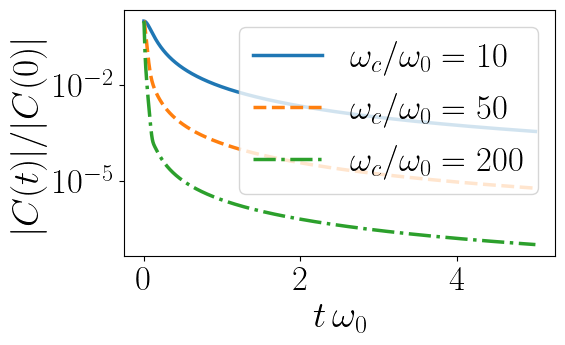

In [ ]:
# Figure (c20) — Bath memory time vs cutoff ωc (Ohmic): oqs_corr_decay_vs_cutoff_ohmic.pdf

from qutip import OhmicEnvironment
from plotstyle import save_fig

w0 = 1.0
alpha = 1e-3 * w0
T = 10.0 * w0
s = 1.0
cutoff_mults = [10.0, 50.0, 200.0]  # ωc/ω0 shown in legend

t = np.linspace(0.0, 5.0 / w0, 6000)
t_w0 = t * w0

fig, ax = plt.subplots(figsize=(6.2, 4.0))
for i, wc_mult in enumerate(cutoff_mults):
    wc = wc_mult * w0
    bath = OhmicEnvironment(T=T, wc=wc, s=s, alpha=alpha)
    C = bath.correlation_function(t)
    env = np.abs(C)
    env0 = env[0] if env[0] != 0 else 1.0
    ax.plot(
        t_w0,
        env / env0,
        label=rf"$\omega_c/\omega_0={wc_mult:g}$",
        color=COLORS[i % len(COLORS)],
    )

ax.set_xlabel(r"$t\,\omega_0$")
ax.set_ylabel(r"$|C(t)|/|C(0)|$")
ax.set_yscale("log")
#ax.set_title(
#    rf"Ohmic bath ($s=1$): memory vs cutoff, $T/\omega_0={T/w0:g}$, $\alpha/\omega_0={alpha/w0:.0e}$",
#)
ax.legend()
fig.tight_layout()

out = LATEX_FIG_DIR / "oqs_corr_decay_vs_cutoff_ohmic.svg"
saved = save_fig(fig, out)
#print(f"Saved: {saved[0]}")
plt.show()

In [51]:
from plotstyle import init_style
import matplotlib as mpl

# Apply plotstyle defaults, then override for this session
init_style(
    rc_overrides={
        "lines.linewidth": 3.5,
        "font.size": 18,
    }
)

print("lines.linewidth =", mpl.rcParams["lines.linewidth"])

lines.linewidth = 3.5


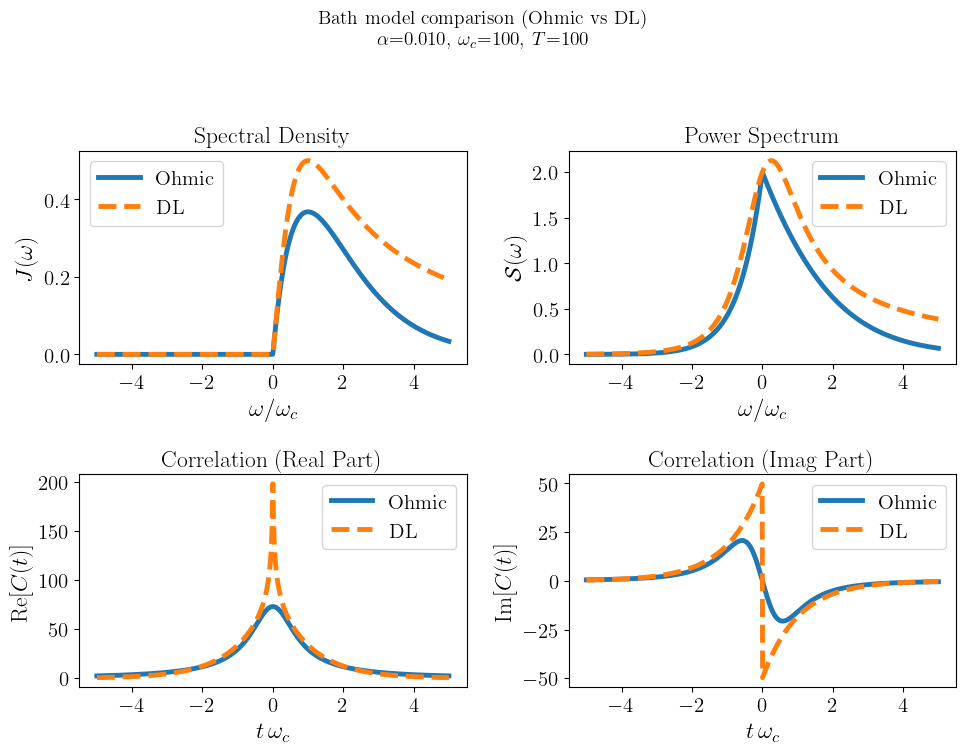

In [52]:
# Figure (c20) — Bath model comparison (Ohmic vs DL): bath_comparison_combined_*.png

from qutip import DrudeLorentzEnvironment, OhmicEnvironment
from plotstyle import save_fig

alpha = 0.010
wc = 100.0
T = 100.0
s = 1.0

bath_ohm = OhmicEnvironment(T=T, wc=wc, s=s, alpha=alpha)

# To match the Ohmic bath at low frequencies, adjust lam for Drude-Lorentz:
# For Ohmic s=1: J(ω) ≈ α ω (at low ω)
# For Drude-Lorentz: J(ω) ≈ 2 λ ω / γ (at low ω)
# So set λ = α γ / 2 to approximate the same low-ω behavior
bath_dl = DrudeLorentzEnvironment(T=T, lam=alpha * wc / 2, gamma=wc)

omega = np.linspace(-5 * wc, 5 * wc, 800)
times = np.linspace(-5 / wc, 5 / wc, 800)

datasets = [
    ("Ohmic", bath_ohm.spectral_density(omega), bath_ohm.power_spectrum(omega), bath_ohm.correlation_function(times)),
    ("DL", bath_dl.spectral_density(omega), bath_dl.power_spectrum(omega), bath_dl.correlation_function(times)),
]

fig, axes = four_panel_comparison(
    omega / wc,
    times * wc,
    datasets,
    title=("Bath model comparison (Ohmic vs DL)\n" + rf"$\alpha$={alpha:.3f}, $\omega_c$={wc:.0f}, $T$={T:.0f}"),
    filename=None,
    normalize=False,
)

# Save all common thesis formats (never only PNG)
out_base = LATEX_FIG_DIR / f"bath_comparison_combined_{alpha:0.3f}_{wc:0.2f}_{T:0.3f}"
# saved = save_fig(fig, out_base, formats=("svg", "pdf", "png"), dpi=300)
# print("Saved:", *saved, sep="\n  - ")
plt.show()


c:\Users\leopo\anaconda3\envs\m_env\Lib\site-packages\qutip\utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


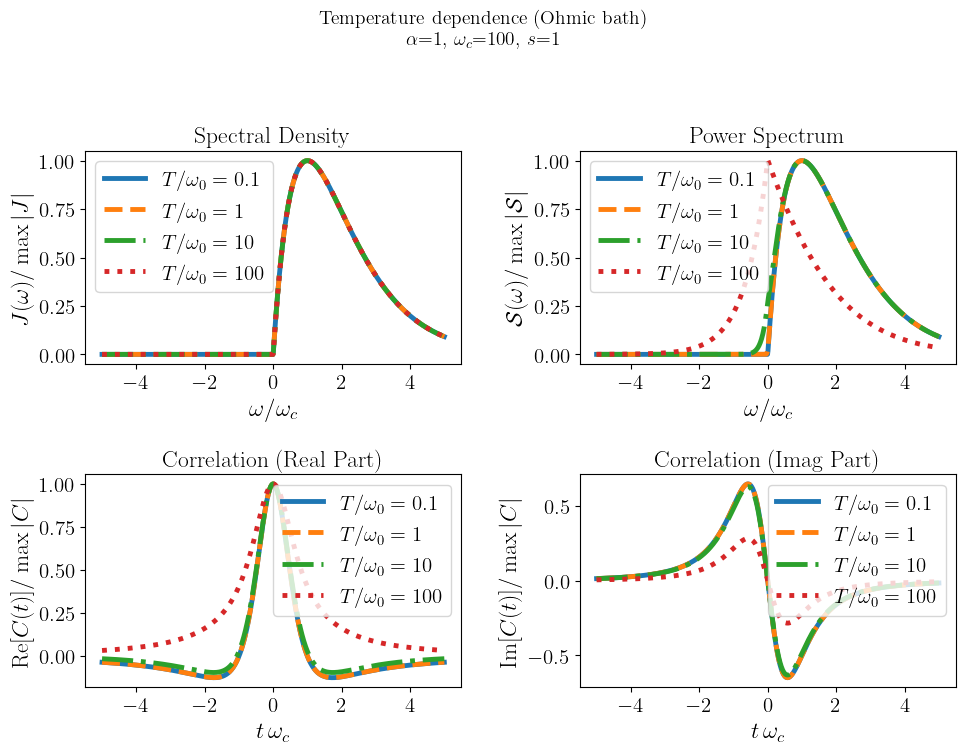

In [53]:
# Figure (c20) — Temperature dependence for an Ohmic bath: temperature_analysis_ohmic_bath.png

from qutip import OhmicEnvironment

alpha = 1.0
wc = 100.0
s = 1.0
temp_mults = [0.1, 1.0, 10.0, 100.0]  # T/ω0 with ω0=1
temps = [t for t in temp_mults]
labels = [rf"$T/\omega_0={t:g}$" for t in temp_mults]

# Use the same scaled grids as the comparison plots above
omega = np.linspace(-5 * wc, 5 * wc, 800)
times = np.linspace(-5 / wc, 5 / wc, 800)

baths = [OhmicEnvironment(T=T, wc=wc, s=s, alpha=alpha) for T in temps]
datasets = [(labels[i], baths[i].spectral_density(omega), baths[i].power_spectrum(omega), baths[i].correlation_function(times)) for i in range(len(baths))]

fig, axes = four_panel_comparison(
    omega / wc,
    times * wc,
    datasets,
    title=("Temperature dependence (Ohmic bath)\n" + rf"$\alpha$={alpha:g}, $\omega_c$={wc:.0f}, $s$={s:g}"),
    filename=None,
    normalize=True,
 )

out = LATEX_FIG_DIR / "temperature_analysis_ohmic_bath"
#saved = save_fig(fig, out, formats=["png", "pdf", "svg"])
#print(f"Saved: {saved[0]}")
plt.show()

Saved:
  - C:\Users\leopo\.vscode\Master_thesis-1\latex\figures\oqs_bath_comparison_sub_super_ohmic.png
  - C:\Users\leopo\.vscode\Master_thesis-1\latex\figures\oqs_bath_comparison_sub_super_ohmic.pdf
  - C:\Users\leopo\.vscode\Master_thesis-1\latex\figures\oqs_bath_comparison_sub_super_ohmic.svg


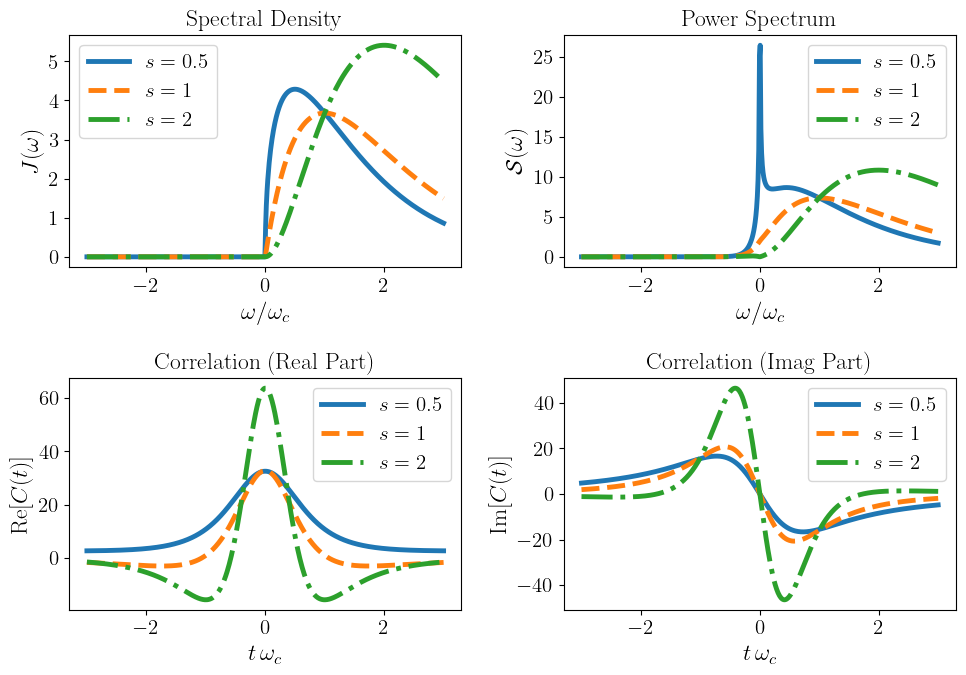

In [67]:
# Four-panel comparison: Ohmic, sub-Ohmic, and super-Ohmic baths (and save to LaTeX figures)

w0 = 1.0
alpha = 1.0
wc = 10.0
T = 1.0

omega = np.linspace(-3 * wc, 3 * wc, 500)
times = np.linspace(-3 / wc, 3 / wc, 500)

s_values = [0.5, 1.0, 2.0]
labels = [r"$s=0.5$", r"$s=1$", r"$s=2$"]

baths = [OhmicEnvironment(T=T, wc=wc, s=s, alpha=alpha) for s in s_values]
datasets = [
    (label, bath.spectral_density(omega), bath.power_spectrum(omega), bath.correlation_function(times))
    for label, bath in zip(labels, baths)
]

fig, axes = four_panel_comparison(
    omega / wc,
    times * wc,
    datasets,
    title="",
    filename=None,
)

out = LATEX_FIG_DIR / f"bath_comparison_sub_super_ohmic_{alpha:0.3f}_{wc:0.2f}_{T:0.3f}"
saved = save_fig(fig, out, formats=["png", "pdf", "svg"])
print("Saved:", *saved, sep="\n  - ")

plt.show()